# Лабораторная работа №3:  Обработка бинарных изображений. Морфология.
## Вариант: №4
## Выполнил: Соколов Роман
## Группа: 6131-010402D

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from itertools import product
from tqdm.notebook import tqdm
from IPython.display import clear_output
from warnings import filterwarnings
from itertools import repeat

In [2]:
PROBABILITY = 0.25

In [3]:
MORPH_CROSS_5x5 = np.array([
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True]
])

In [4]:
def show_image(image):
    plt.axis("off")
    plt.imshow(image, cmap='gray')

In [5]:
def add_noise(image, probability):
    image_rows, image_cols, chanels = image.shape
    output_image = image.copy()
        
    for pixel in list(product(range(image_rows), range(image_cols))):
        if np.random.random() <= probability:
            output_image[pixel[0], pixel[1]] = 255

    return output_image

# Задание 1

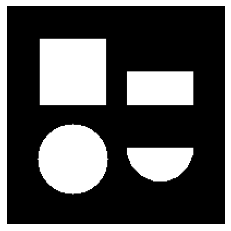

In [6]:
img = np.zeros([200, 200], np.uint8)

# Квадраты
cv2.rectangle(img, (90, 90), (30, 30), (255, 255, 255), -1)
cv2.ellipse(img,(140,130),(30,30),0,0,180,255,-1)

# Круги
cv2.rectangle(img, (170, 90), (110,60), (255, 255, 255), -1)
cv2.circle(img, (60, 140), 32, (255, 255, 255), -1)


show_image(img)

# Задание 2

In [7]:
def pulse_noise(image, probability):

    image_rows, image_cols = image.shape
    output_image = image.copy()

    for pixel in list(product(range(image_rows), range(image_cols))):
        if np.random.random() <= probability:
            output_image[pixel[0], pixel[1]] = 255

    return output_image

Зашумленное изображение:


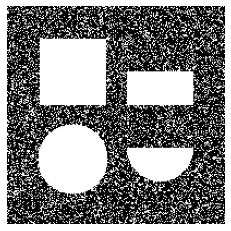

In [8]:
impulse_image = pulse_noise(img, PROBABILITY)
print("Зашумленное изображение:")
show_image(impulse_image)

# Задание 3

In [9]:
def get_value(current_window, kernel):
    vals = []
    kernel_rows, kernel_cols = kernel.shape

    for i, j in np.ndindex((kernel_rows, kernel_cols)):
        if kernel[i, j] == 1:
            vals.append(current_window[i, j])

    return vals

In [10]:
def erosian(image, kernel):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    temp_image = np.zeros((image_rows + 2 * (kernel_rows // 2), image_cols + 2 * (kernel_cols // 2)))
    temp_image[
        (kernel_rows // 2): image_rows + 2 * (kernel_rows // 2) - (kernel_rows // 2),
        (kernel_cols // 2): image_cols + 2 * (kernel_cols // 2) - (kernel_cols // 2)
    ] = image
    output_image = image.copy()

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        current_window = temp_image[i: i + kernel_rows, j: j + kernel_cols]
        output_image[i, j] = np.min(get_value(current_window, kernel))

    clear_output()
    return output_image

In [11]:
def dilation(image, kernel):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    temp_image = np.zeros((image_rows + 2 * (kernel_rows // 2), image_cols + 2 * (kernel_cols // 2)))
    temp_image[
        (kernel_rows // 2): image_rows + 2 * (kernel_rows // 2) - (kernel_rows // 2),
        (kernel_cols // 2): image_cols + 2 * (kernel_cols // 2) - (kernel_cols // 2)
    ] = image
    output_image = image.copy()

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        current_window = temp_image[i: i + kernel_rows, j: j + kernel_cols]
        output_image[i, j] = np.max(get_value(current_window, kernel))

    clear_output()
    return output_image

# Задание 4

Изображение после операции эрозии:


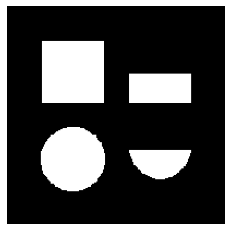

In [12]:
erosian_image = erosian(impulse_image, MORPH_CROSS_5x5)
print("Изображение после операции эрозии:")
show_image(erosian_image)

Изображение после операции дилатации:


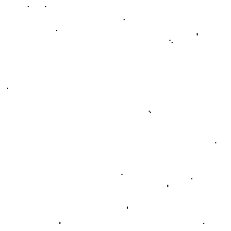

In [13]:
dilation_image = dilation(impulse_image, MORPH_CROSS_5x5)
print("Изображение после операции дилатации:")
show_image(dilation_image)

# Задание 5

In [14]:
def opening(image, kernel):
    return dilation(erosian(image, kernel), kernel)

In [15]:
def closing(image, kernel):
    return erosian(dilation(image, kernel), kernel)

In [16]:
def noise_factor(image1, image2):
    return (np.sum(image1 != image2)/(image1.shape[0] * image1.shape[1])) * 100

Исходное изображение:
Коэффициент шума: 0.0%


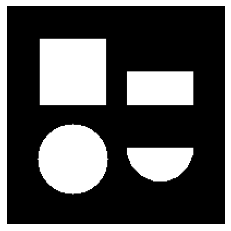

In [17]:
print("Исходное изображение:")
show_image(img)
print(f"Коэффициент шума: {noise_factor(img, img)}%")

Зашумленное изображение:
Коэффициент шума: 18.56%


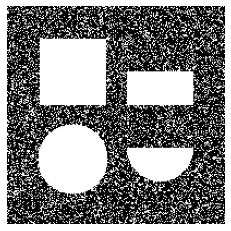

In [18]:
print("Зашумленное изображение:")
show_image(impulse_image)
print(f"Коэффициент шума: {noise_factor(img, impulse_image)}%")

Изображение после операции вскрытия:
Коэффициент зашумленности: 0.1%


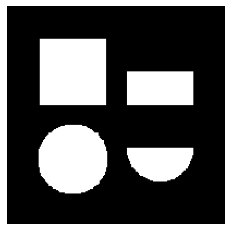

In [19]:
opening_image = opening(impulse_image, MORPH_CROSS_5x5)
print("Изображение после операции вскрытия:")
show_image(opening_image)
print(f"Коэффициент зашумленности: {noise_factor(img, opening_image)}%")

Изображение после операции вскрытия:
Коэффициент зашумленности: 0.1%


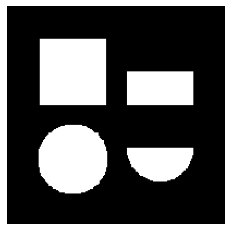

In [20]:
opening_image = opening(impulse_image, MORPH_CROSS_5x5)
print("Изображение после операции вскрытия:")
show_image(opening_image)
print(f"Коэффициент зашумленности: {noise_factor(img, opening_image)}%")

Изображение после операции закрытия:
Коэффициент зашумленности: 69.47%


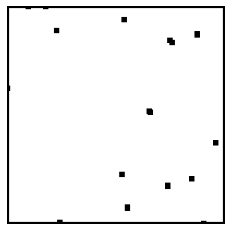

In [21]:
closed_image = closing(impulse_image, MORPH_CROSS_5x5)
print("Изображение после операции закрытия:")
show_image(closed_image)
print(f"Коэффициент зашумленности: {noise_factor(img, closed_image)}%")

# Задание 6

In [22]:
def value_for_logic_filter(image, i, j):
    filter_value = image[i, j] and (image[i - 1, j] or image[i, j - 1] or image[i, j + 1] or image[i + 1, j]) \
        or (not image[i, j]) and (image[i - 1, j] and image[i, j - 1] and image[i, j + 1] and image[i + 1, j])
    return int(filter_value)

In [23]:
def logic_filter(image):
    image_rows, image_cols = image.shape
    output_image = np.copy(image)

    temp_image = np.zeros((image_rows + 2, image_cols + 2))
    temp_image[1: -1, 1: -1] = image
    temp_image = temp_image.astype(bool)

    for i, j in tqdm(np.ndindex((image_rows, image_cols))):
        output_image[i, j] = value_for_logic_filter(temp_image, i, j)

    clear_output()
    return output_image

Исходное изображение:
Коэффициент шума: 0.0%


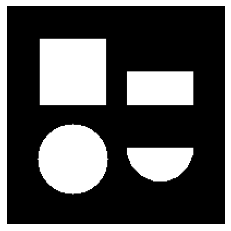

In [24]:
print("Исходное изображение:")
show_image(img)
print(f"Коэффициент шума: {noise_factor(img, img)}%")

Зашумленное изображение
Коэффициент зашумленности: 18.56%


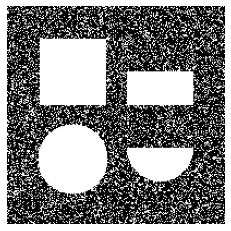

In [25]:
print("Зашумленное изображение")
show_image(impulse_image)
print(f"Коэффициент зашумленности: {noise_factor(img, impulse_image)}%")

Коэффициент зашумленности: 39.105000000000004%


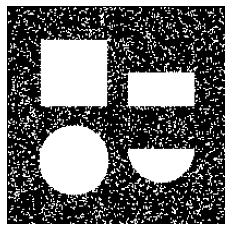

In [26]:
print("Изображение после обработки логическим фильтром")
logic_image = logic_filter(impulse_image)
show_image(logic_image)
print(f"Коэффициент зашумленности: {noise_factor(img, logic_image)}%")

# Задание 7

Исходное изображение:


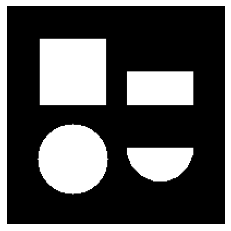

In [27]:
print("Исходное изображение:")
show_image(img)

Внешний контур


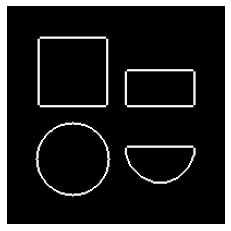

In [29]:
element = np.array([
    [False, False, True, False, False],
    [False, False, True, False, False],
    [True, True,  True, True, True],
    [False, False, True, False, False],
    [False, False, True, False, False]
])

show_image((img ^ dilation(img, element)))
print("Внешний контур")

Внутренний контур


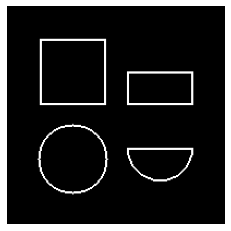

In [30]:
element = np.array([
    [False, False, True, False, False],
    [False, False, True, False, False],
    [True, True,  True, True, True],
    [False, False, True, False, False],
    [False, False, True, False, False]
])
show_image((img ^ erosian(img, element)))
print("Внутренний контур")

Четырехсвязный внутренний контур


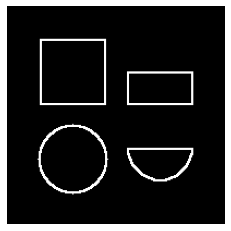

In [31]:
element = np.array([
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True],
    [True, True, True, True, True]
])

show_image((img ^ erosian(img, element)))
print("Четырехсвязный внутренний контур")

Восьмисвязный внутренний контур


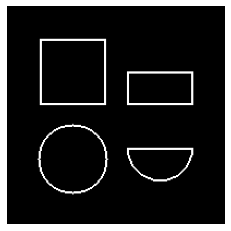

In [32]:
element = np.array([
    [False, False, True, False, False],
    [False, False, True, False, False],
    [True, True,  True, True, True],
    [False, False, True, False, False],
    [False, False, True, False, False]
])

show_image((img ^ erosian(img, element)))
print("Восьмисвязный внутренний контур")

# Задание 8

Исходное изображение:


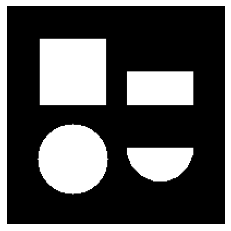

In [33]:
print("Исходное изображение:")
show_image(img)

Горизонтальные контуры изображения:


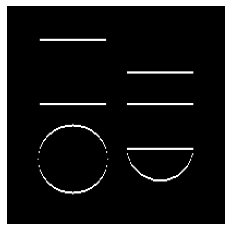

In [35]:
struct_element = np.array([
    [True],
    [True],
    [True], 
    [True], 
    [True]
])
show_image((img ^ erosian(img, struct_element)))
print("Горизонтальные контуры изображения:")

Вертикальные контуры изображения:


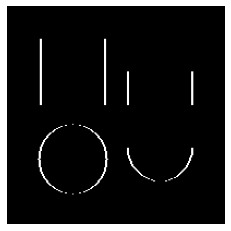

In [36]:
struct_element = np.array([
    [True, True, True, True, True]
])
show_image((img ^ erosian(img, struct_element)))
print("Вертикальные контуры изображения:")